<a href="https://colab.research.google.com/github/Elizabethpg22/Actividad_3_ValoresAtipicos/blob/main/Gastos_y_costos_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_2022 =pd.read_excel ('Gastos y costos 20-23.xlsx', sheet_name= '2022', skiprows= 3)
df_2022 = df_2022.drop(['Otros'], axis = 1)
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC           1941 non-null   float64       
 9   Importe      2577 non-null   float64       
 10  IVA          2577 non-null   float64       
 11  RET ISR      2577 non-null   float64       
 12  RET IVA      2577 non-null   float64       
 13  TOTAL MX     2577 non-null   float64       
 14  TOTAL SAT    2577 non-null   float64       
 15  Tipo         2577 non-null   object        
 16  Status

In [12]:
#Corroborar valores nulos
datos_nulos = df_2022.isnull().sum()
datos_nulos

Fecha            0
Folio          102
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       0
Descripción      0
MP             553
TC             636
Importe          0
IVA              0
RET ISR          0
RET IVA          0
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         801
dtype: int64

In [13]:
#Remplazar valores nulos del dataframe con bfill
df_2022 = df_2022.fillna(method='bfill')
#Corroborar valores nulos
valores_nulos1 = df_2022.isnull().sum()
valores_nulos1

Fecha           0
Folio           0
UUID            0
RFC             0
Proveedor       0
TIPO GASTO      0
Descripción     0
MP              3
TC              3
Importe         0
IVA             0
RET ISR         0
RET IVA         0
TOTAL MX        0
TOTAL SAT       0
Tipo            0
Status          0
Poliza         12
dtype: int64

In [14]:
#Remplazar los nulos con desconocido
df_2022[['Poliza','MP']]= df_2022[['Poliza','MP']].fillna("Desconocido")
df_2022['TC']= df_2022['TC'].fillna(1)

In [15]:
#Corroborar valores nulos
valores_nulos1 = df_2022.isnull().sum()
valores_nulos1

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

In [16]:
ALFABETICAS = df_2022.iloc[: , [0,1,2,3,4,5,6,7,15,16,17]]
NUMERICAS  = df_2022.iloc[: ,[8,9,10,11,12,13,14]]

<Figure size 1500x500 with 0 Axes>

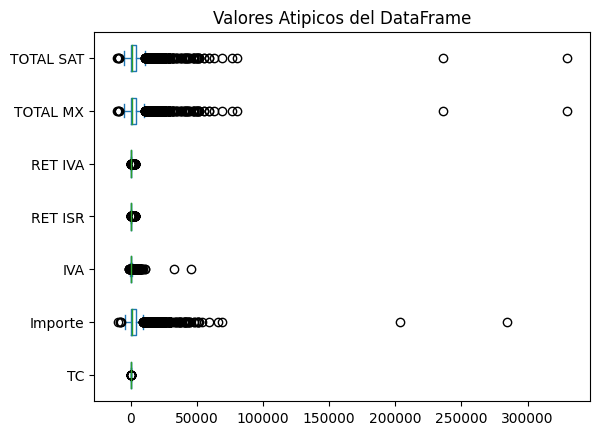

In [17]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,5))
NUMERICAS.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show() #Dibujamos el diagrama

In [18]:
#Procedimiento de desviacion estandar para eliminar outliers en dataframe
y= NUMERICAS
Limite_superior =y.mean() + 3*y.std()
Limite_inferior =y.mean() - 3*y.std()

print('Limite superior permitido', Limite_superior)
print('Limite inferior permitido', Limite_inferior)

Limite superior permitido TC               6.217037
Importe      34975.501132
IVA           5048.646001
RET ISR        977.619941
RET IVA       1046.847384
TOTAL MX     39054.094273
TOTAL SAT    39095.543969
dtype: float64
Limite inferior permitido TC              -3.918360
Importe     -26990.441616
IVA          -4069.819702
RET ISR       -902.558225
RET IVA       -964.592475
TOTAL MX    -30247.525081
TOTAL SAT   -30172.959879
dtype: float64


In [21]:
#Encontramos Outliers del DataFrame
outliers = NUMERICAS[(y>Limite_superior)|(y<Limite_inferior)]
#Obtenemos datos limpios del DataFrame
NUMERICAS_IQR = NUMERICAS[(y<=Limite_superior)&(y>=Limite_inferior)]
NUMERICAS_IQR

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [22]:
##Remplazamos valores atipicos (nulos) del dataframe con "mean"
NUMERICOS_CLEAN = NUMERICAS_IQR.copy()
NUMERICOS_CLEAN  = NUMERICOS_CLEAN .fillna(round(NUMERICAS_IQR.mean(), 1))
NUMERICOS_CLEAN

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [23]:
#Unimos la columna 'indice_tiempo on el dataframe
Datos_COMPLETOS = pd.concat([ALFABETICAS, NUMERICOS_CLEAN ], axis=1)
Datos_COMPLETOS

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,I,Vigente,PE02-ENE22,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,I,Vigente,PE03-ENE22,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,I,Vigente,PE01-ENE22,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,P,Vigente,PE01-ENE22,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,P,Vigente,PE01-ENE22,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,Desconocido,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,Desconocido,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,Desconocido,P,Vigente,Desconocido,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,Desconocido,P,Vigente,Desconocido,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [24]:
#Corroborar valores nulos
valores_nulos = Datos_COMPLETOS.isnull().sum()
valores_nulos

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
Tipo           0
Status         0
Poliza         0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
dtype: int64

In [25]:
Datos_COMPLETOS.to_csv("2022_clean.csv")
from google.colab import files
files.download("2022_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>